In [1]:
#dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
#import CSV files 
state_code_to_load = Path("resources/state_taxes_resources/state_codes.csv")
alcohol_consumption_to_load = Path("resources/state_taxes_resources/alcohol-consumption-by-state-2024.csv")
alcohol_tax_to_load = Path("resources/state_taxes_resources/alcohol-tax-by-state-2024.csv")

#read the CSV files
state_codes = pd.read_csv(state_code_to_load)
alcohol_consumption = pd.read_csv(alcohol_consumption_to_load)
alcohol_tax = pd.read_csv(alcohol_tax_to_load)

# merge the CSV files for analysis
merged_df = pd.merge(state_codes, alcohol_consumption, how = "left", on = ["state", "state"])
merged_df = pd.merge(merged_df, alcohol_tax, how = "left", on = ["state", "state"])

In [3]:
# formatting the dataframe    
merged_df.rename(columns = {'state': 'State',
                            'abbrev': 'Abbreviation',
                            'code': 'State_Code',
                            'AlcoholConsumptionGallonsOfEthanolPerCapita': 'Ethanol_per_Capita',
                            'AlcoholConsumptionDrivingFatalitiesInvolvingAlcohol': 'Fatalities_Involving_Alcohol',
                            'AlcoholConsumptionExcessiveDrinkingRate': 'Excessive_Drinking_Rate',
                            'AlcoholTaxBeerTax': 'Beer_Tax',
                            'AlcoholTaxSpiritsTax': 'Spirits_Tax',
                            'AlcoholTaxWineTax': 'Wine_Tax'}, inplace = True)

# export to CSV file
merged_df.to_csv("resources/state_taxes_consumption.csv")

# print dataframe
merged_df.head()

,State,Abbreviation,State_Code,Ethanol_per_Capita,Fatalities_Involving_Alcohol,Excessive_Drinking_Rate,Beer_Tax,Spirits_Tax,Wine_Tax
0,Alabama,Ala.,AL,2.08,25.9,14.8,0.53,0.0,1.70
1,Alaska,Alaska,AK,2.83,36.9,18.1,1.07,12.8,2.50
2,Arizona,Ariz.,AZ,2.24,22.3,17.4,0.16,3.0,0.84
3,Arkansas,Ark.,AR,1.92,25.7,15.9,0.23,2.5,0.75
4,California,Calif.,CA,2.63,27.7,18.8,0.20,3.3,0.20


In [4]:
# top 10 ethanol per capita states
top_ethanol_states = merged_df.sort_values(by = 'Ethanol_per_Capita', ascending = False)
top_ethanol_states.head(10)

,State,Abbreviation,State_Code,Ethanol_per_Capita,Fatalities_Involving_Alcohol,Excessive_Drinking_Rate,Beer_Tax,Spirits_Tax,Wine_Tax
29,New Hampshire,N.H.,NH,4.83,33.1,20.8,0.30,0.00,0.00
7,Delaware,Del.,DE,4.01,25.0,20.5,0.26,4.50,1.63
8,District of Columbia,D.C.,DC,3.79,NaN,NaN,NaN,NaN,NaN
28,Nevada,Nev.,NV,3.43,27.3,19.5,0.16,3.60,0.70
26,Montana,Mont.,MT,3.32,46.4,24.3,0.14,0.00,1.06
34,North Dakota,N.D.,ND,3.26,41.4,24.1,0.16,2.50,0.50
45,Vermont,Vt.,VT,3.22,35.4,23.2,0.26,0.00,0.55
49,Wisconsin,Wis.,WI,3.11,35.6,25.2,0.06,3.28,0.25
19,Maine,Maine,ME,2.99,34.4,22.5,0.35,0.00,0.60
5,Colorado,Colo.,CO,2.97,34.0,20.1,0.08,2.28,0.28


In [5]:
# calculate and print averages for the data
avg_beer_tax = merged_df['Beer_Tax'].mean().round(2)
avg_wine_tax = merged_df['Wine_Tax'].mean().round(2)
avg_spirits_tax = merged_df['Spirits_Tax'].mean().round(2)
avg_ethanol_per_capita = merged_df['Ethanol_per_Capita'].mean().round(2)
avg_fatatlities = merged_df['Fatalities_Involving_Alcohol'].mean().round(2)
avg_excessive_drinking = merged_df['Excessive_Drinking_Rate'].mean().round(2)


print("NA Average Beer Tax is " + str(avg_beer_tax) + "%")
print("NA Average Wine Tax is " + str(avg_wine_tax) + "%")
print("NA Average Spirits Tax is " + str(avg_spirits_tax) + "%")
print("NA Average Consumption (gallons per capita) is " + str(avg_ethanol_per_capita))
print("NA Average Fatalities is " + str(avg_fatatlities))
print("NA Average Excessive Drinking is " + str(avg_excessive_drinking))

NA Average Beer Tax is 0.3%
NA Average Wine Tax is 0.82%
NA Average Spirits Tax is 3.05%
NA Average Consumption (gallons per capita) is 2.57
NA Average Fatalities is 28.93
NA Average Excessive Drinking is 19.6


In [6]:
# states with highest spirits taxes
state_spirits_df = merged_df[['State', 'Spirits_Tax']].copy()
state_spirits_df = state_spirits_df[state_spirits_df['State'] != 'District of Columbia']
top_sorted_tax = state_spirits_df.sort_values(by = 'Spirits_Tax', ascending = False)

# states with lowest spirits taxes (not null or zero)
bottom_sorted_tax = state_spirits_df[(state_spirits_df['Spirits_Tax'].notnull()) & (state_spirits_df['Spirits_Tax'] != 0)]
bottom_sorted_tax = bottom_sorted_tax.sort_values(by = 'Spirits_Tax', ascending = True)

# print results 
print("States with the highest spirits tax: ")
print(top_sorted_tax.head(10))
print("")
print("")
print("States with the lowest spirits tax: ")
print(bottom_sorted_tax.head(10))

States with the highest spirits tax: 
          State  Spirits_Tax
47   Washington        14.27
1        Alaska        12.80
13     Illinois         8.55
9       Florida         6.50
32     New York         6.44
31   New Mexico         6.06
11       Hawaii         5.98
6   Connecticut         5.94
36     Oklahoma         5.56
30   New Jersey         5.50


States with the lowest spirits tax: 
             State  Spirits_Tax
20        Maryland         1.50
17        Kentucky         1.92
25        Missouri         2.00
5         Colorado         2.28
43           Texas         2.40
16          Kansas         2.50
34    North Dakota         2.50
3         Arkansas         2.50
14         Indiana         2.68
40  South Carolina         2.72


In [7]:
# states with highest ethanol consumption
state_consumption_df = merged_df[['State', 'Ethanol_per_Capita']].copy()
state_consumption_df = state_consumption_df[state_consumption_df['State'] != 'District of Columbia']
top_sorted_consumption = state_consumption_df.sort_values(by = 'Ethanol_per_Capita', ascending = False)

# states with lowest consumption
bottom_sorted_consumption = state_consumption_df.sort_values(by = 'Ethanol_per_Capita', ascending = True)

# print results 
print("States with the highest ethanol per capita: ")
print(top_sorted_consumption.head(10))
print("")
print("")
print("States with the lowest ethanol per capita: ")
print(bottom_sorted_consumption.head(10))

States with the highest ethanol per capita: 
            State  Ethanol_per_Capita
29  New Hampshire                4.83
7        Delaware                4.01
28         Nevada                3.43
26        Montana                3.32
34   North Dakota                3.26
45        Vermont                3.22
49      Wisconsin                3.11
19          Maine                2.99
5        Colorado                2.97
50        Wyoming                2.94


States with the lowest ethanol per capita: 
             State  Ethanol_per_Capita
44            Utah                1.36
48   West Virginia                1.82
36        Oklahoma                1.85
10         Georgia                1.91
3         Arkansas                1.92
0          Alabama                2.08
12           Idaho                2.10
35            Ohio                2.12
40  South Carolina                2.12
16          Kansas                2.12


In [8]:
# put lowest taxes and highest consumption in dataframes
lowest_taxes = pd.DataFrame(bottom_sorted_tax)
highest_consumption = pd.DataFrame(top_sorted_consumption)

# print results
print(lowest_taxes.head(10))
print("")
print("")
print(highest_consumption.head(10))

             State  Spirits_Tax
20        Maryland         1.50
17        Kentucky         1.92
25        Missouri         2.00
5         Colorado         2.28
43           Texas         2.40
16          Kansas         2.50
34    North Dakota         2.50
3         Arkansas         2.50
14         Indiana         2.68
40  South Carolina         2.72


            State  Ethanol_per_Capita
29  New Hampshire                4.83
7        Delaware                4.01
28         Nevada                3.43
26        Montana                3.32
34   North Dakota                3.26
45        Vermont                3.22
49      Wisconsin                3.11
19          Maine                2.99
5        Colorado                2.97
50        Wyoming                2.94


In [9]:
# put highest taxes and lowest consumption in dataframes
highest_taxes = pd.DataFrame(top_sorted_tax)
lowest_consumption = pd.DataFrame(bottom_sorted_consumption)

# print results 
print(highest_taxes.head(10))
print("")
print("")
print(lowest_consumption.head(10))

          State  Spirits_Tax
47   Washington        14.27
1        Alaska        12.80
13     Illinois         8.55
9       Florida         6.50
32     New York         6.44
31   New Mexico         6.06
11       Hawaii         5.98
6   Connecticut         5.94
36     Oklahoma         5.56
30   New Jersey         5.50


             State  Ethanol_per_Capita
44            Utah                1.36
48   West Virginia                1.82
36        Oklahoma                1.85
10         Georgia                1.91
3         Arkansas                1.92
0          Alabama                2.08
12           Idaho                2.10
35            Ohio                2.12
40  South Carolina                2.12
16          Kansas                2.12


In [10]:
ethical_df = merged_df[['State', 'Ethanol_per_Capita', 'Fatalities_Involving_Alcohol', 'Excessive_Drinking_Rate']].copy()
ethical_df = ethical_df[ethical_df['State'] != 'District of Columbia']
ethical_df = ethical_df.sort_values(by = 'Ethanol_per_Capita', ascending = False)
ethical_df.head()

,State,Ethanol_per_Capita,Fatalities_Involving_Alcohol,Excessive_Drinking_Rate
29,New Hampshire,4.83,33.1,20.8
7,Delaware,4.01,25.0,20.5
28,Nevada,3.43,27.3,19.5
26,Montana,3.32,46.4,24.3
34,North Dakota,3.26,41.4,24.1


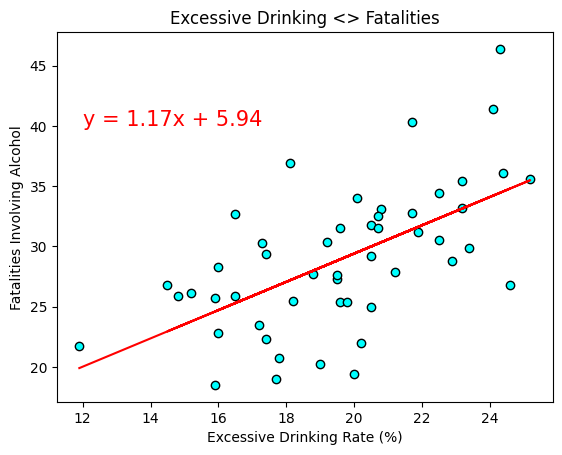

In [11]:
def scatter_plots(x, y, position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = 'o', facecolors = 'cyan', edgecolors = 'black')
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, position, fontsize = 15, color = 'r')

# scatter plot for ethical considerations 
excessive_drinking = ethical_df['Excessive_Drinking_Rate']
fatalities = ethical_df['Fatalities_Involving_Alcohol']
scatter_plots(excessive_drinking, fatalities, (12, 40))

# formatting
plt.title('Excessive Drinking <> Fatalities')
plt.xlabel('Excessive Drinking Rate (%)')
plt.ylabel('Fatalities Involving Alcohol')

# save fig and plot scatter plot
plt.savefig("outputs/ethical_regression.png")
plt.show()

In [12]:
state_consumption_and_taxes = merged_df[['State', 'Ethanol_per_Capita', 'Spirits_Tax']].copy()
state_consumption_and_taxes = state_consumption_and_taxes[state_consumption_and_taxes['State'] != 'District of Columbia']
state_consumption_and_taxes = state_consumption_and_taxes[(state_consumption_and_taxes['Spirits_Tax'].notnull()) & (state_consumption_and_taxes['Spirits_Tax'] != 0)]

state_consumption_and_taxes = state_consumption_and_taxes.sort_values(by = 'Ethanol_per_Capita', ascending = False)
# state_consumption_and_taxes

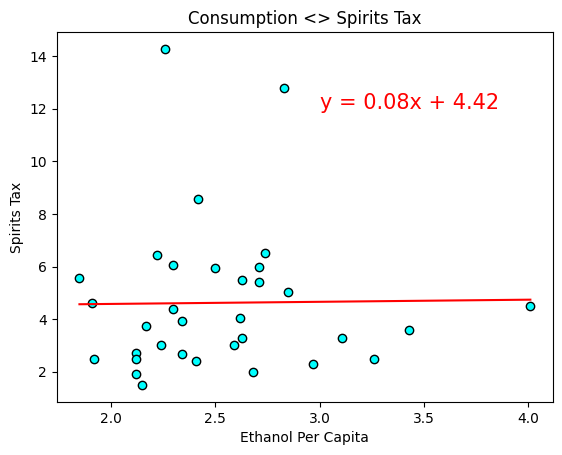

In [13]:
# scatter plot for ethical considerations 
ethanol_consumption = state_consumption_and_taxes['Ethanol_per_Capita']
spirits_tax_by_state = state_consumption_and_taxes['Spirits_Tax']
scatter_plots(ethanol_consumption, spirits_tax_by_state, (3, 12))

# formatting
plt.title('Consumption <> Spirits Tax')
plt.xlabel('Ethanol Per Capita')
plt.ylabel('Spirits Tax')

# save fig and plot scatter plot
plt.savefig("outputs/ethanol_tax_fig.png")
plt.show()